In [1]:
#importing libraries

In [33]:
# import tensorflow as tf
import numpy as np
import pickle
from keras.preprocessing.image import ImageDataGenerator

In [34]:
#path to csv data 
path_train = '../data/external/sign_mnist_train.csv'
path_test = '../data/external/sign_mnist_test.csv'

#define image resolution 
res = (28,28)

In [35]:
#convert csv to numpy 
train = np.loadtxt(path_train, delimiter=',', skiprows=1)
test = np.loadtxt(path_test, delimiter=',', skiprows=1)

In [36]:
#training data
X_train = train[:,1:]
y_train = train[:,0]

#testing data 
X_test = test[:,1:]
y_test = test[:,0]

In [37]:
#reshape to image 
X_train = X_train.reshape(X_train.shape[0],28,28)
X_test = X_test.reshape(X_test.shape[0],28,28)

In [38]:
data = (X_train,y_train,X_test,y_test)

In [39]:
with open('../data/external/sign_data.pkl','wb') as f:
    pickle.dump(data, f)

In [40]:
with open('../data/external/sign_data.pkl','rb') as f:
    X_train,y_train,X_test,y_test = pickle.load(f)

In [41]:
#Shape of training and testing data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (27455, 28, 28)
y_train shape: (27455,)
X_test shape: (7172, 28, 28)
y_test shape: (7172,)


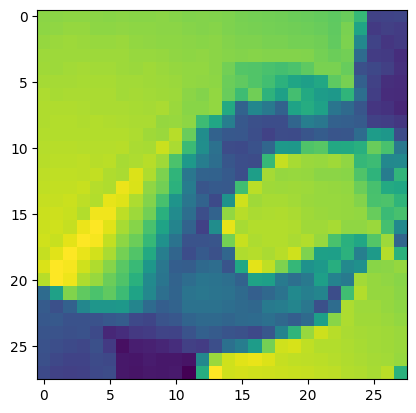

In [42]:
#visualization
import matplotlib.pyplot as plt
plt.imshow(X_train[3]);

In [43]:
# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest'
)

In [44]:
# Reshape input numpy array to (27455, 28, 28, 1) for use with Keras data generator
x_train = np.reshape(X_train , (X_train.shape[0], 28, 28, 1))

In [45]:
#Fit the data generator to the input numpy array
datagen.fit(x_train)

In [46]:
#generate augmented images
augmented_images = datagen.flow(x_train, batch_size=x_train.shape[0], shuffle=False)

In [51]:
#shape of augmented image
augmented_images[0].shape

(28, 28)

In [48]:
#reshape augmented images back to (27455, 28, 28) numpy array
augmented_images = np.reshape(augmented_images[0], (27455, 28, 28))

In [49]:
#checking shape of augmented image
augmented_images.shape

(27455, 28, 28)

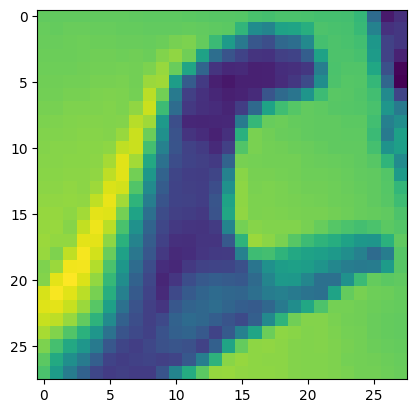

In [50]:
#visualization of augmented data
import matplotlib.pyplot as plt
plt.imshow(augmented_images[2]);

In [57]:
#combining the X-train and Y-train 
data=(augmented_images,y_train)

In [60]:
#dumping data into pickle file
with open('../data/external/augmented_data.pkl','wb') as f:
    pickle.dump(data, f)

In [66]:
#load the pickle file
with open('../data/external/augmented_data.pkl','rb') as f:
    X_aug_train,y_aug_train = pickle.load(f)

In [67]:
print(f'X_aug_train shape: {X_aug_train.shape}')
print(f'y_aug_train shape: {y_aug_train.shape}')

X_aug_train shape: (27455, 28, 28)
y_aug_train shape: (27455,)
